In [3]:
# morphological operators are sets of kernels that can achieve a specific effect
# example 0: from last lecture, reducing noise in a picture
# example 1: certain operators are good at reducing black points on white background
# example 2: erosion and dilation can add or erode from an existing image
# official explanation: https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html
# links: https://homepages.inf.ed.ac.uk/rbf/HIPR2/morops.htm
# links2: https://en.wikipedia.org/wiki/Mathematical_morphology

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def load_img():
    blank_img = np.zeros((600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img,text='ABCDE',org=(50,300),fontFace=font,fontScale=5,color=(255,255,255),thickness=25)
    return blank_img

In [6]:
def display_img(img):
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(1,1,1)
    ax.imshow(img,cmap='gray')

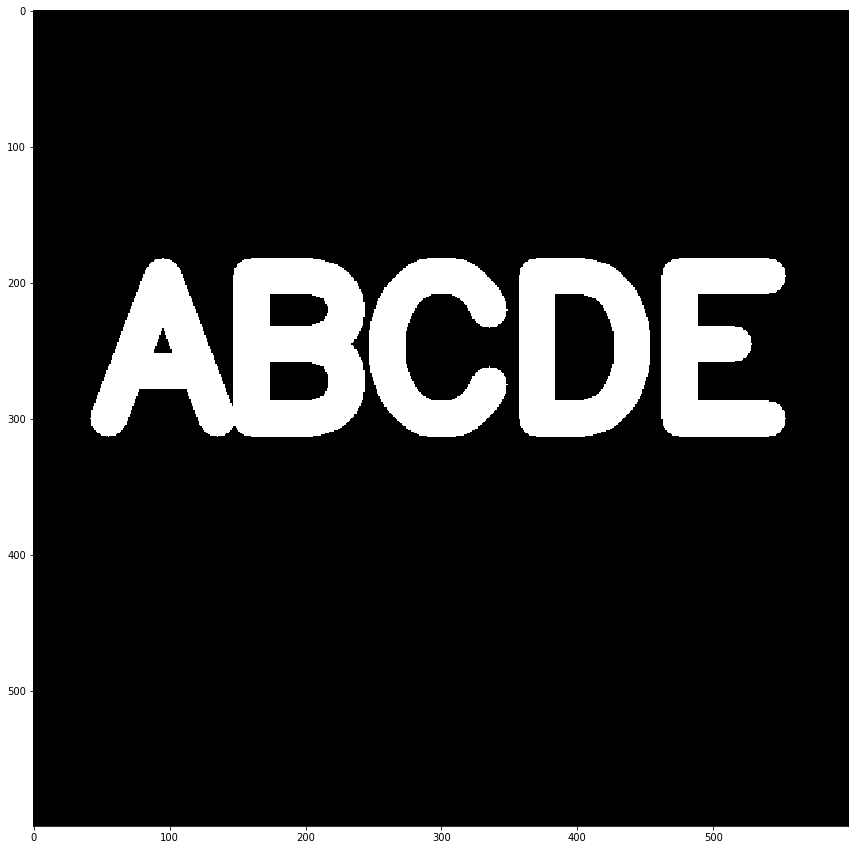

In [7]:
img = load_img()
display_img(img)

In [8]:
kernel = np.ones((5,5),dtype=np.uint8)

In [9]:
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [10]:
result = cv2.erode(img,kernel,iterations=4)

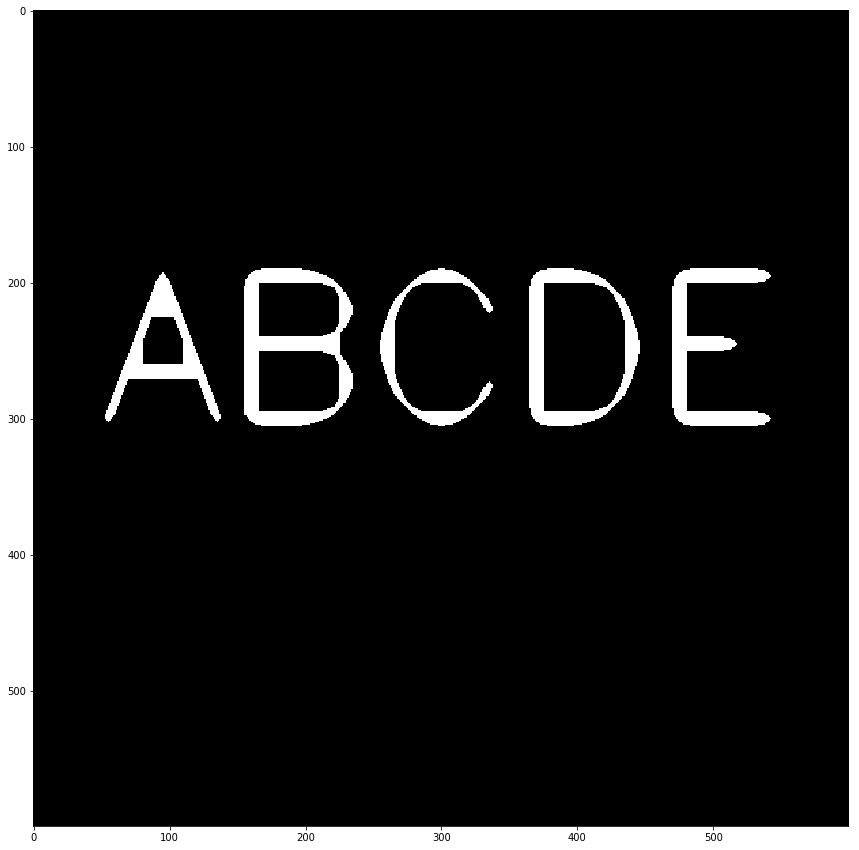

In [11]:
display_img(result)

In [17]:
img = load_img()
img.max()


255.0

In [13]:
white_noise = np.random.randint(low=0,high=2,size=(600,600))

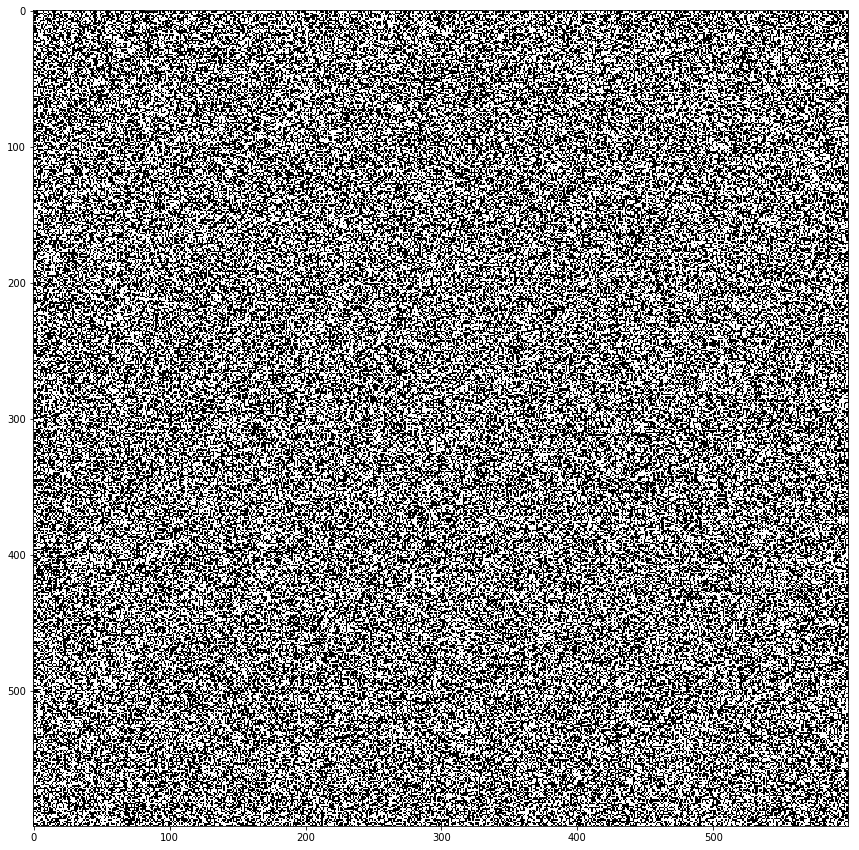

In [15]:
white_noise = white_noise * 255
display_img(white_noise)

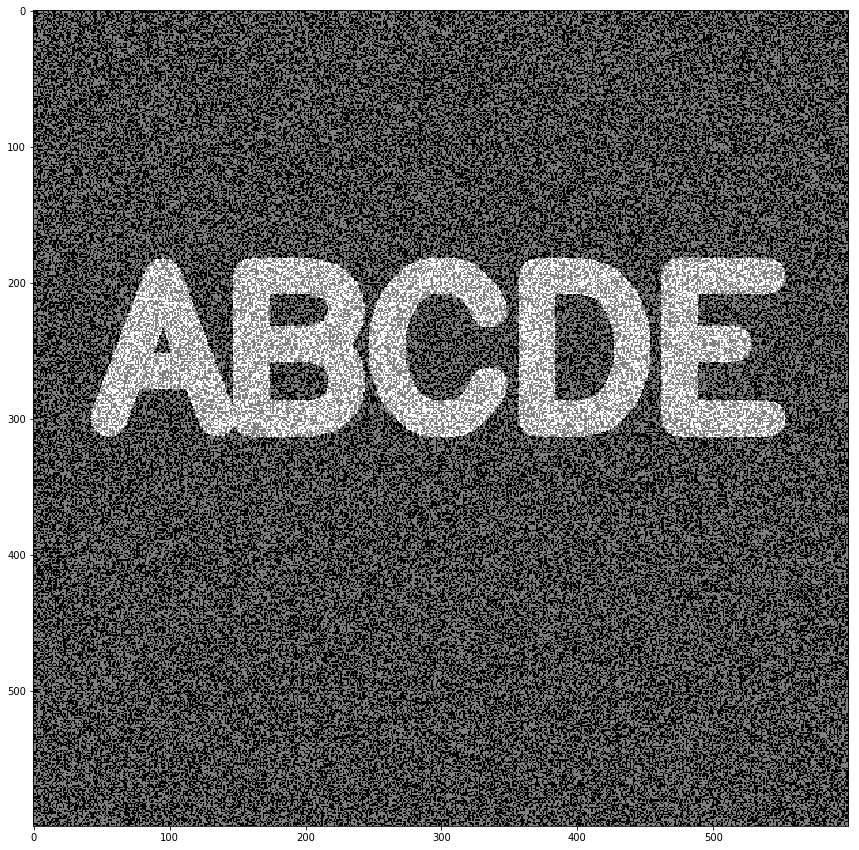

In [28]:
noise_img = white_noise + img
display_img(noise_img)

In [21]:
# opening is simply the act of eroding followed by dilating
# this is good for getting rid of background noise
opening = cv2.morphologyEx(noise_img,cv2.MORPH_OPEN,kernel)

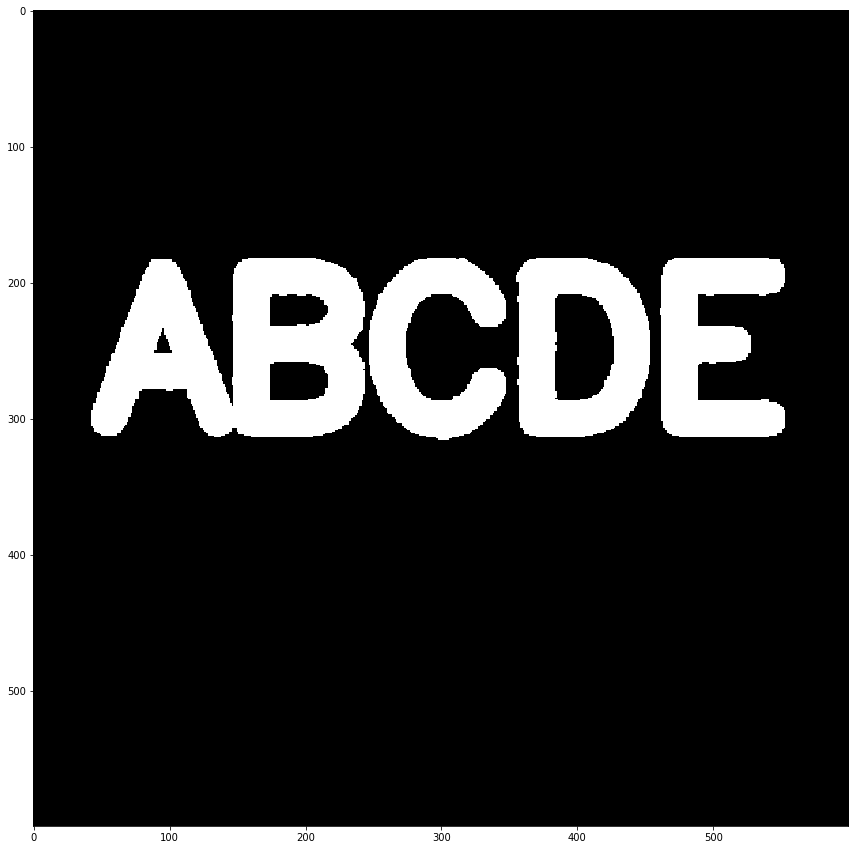

In [98]:
# opening basically works by moving the kernel around the image
# if parts of the kernel has black region in it, it will erode it away
# e.g. it will only keep parts of the white region where the kernel fits
display_img(opening)

In [100]:
img = load_img()

In [101]:
black_noise = np.random.randint(low=0,high=2,size=(600,600))

In [102]:
black_noise = black_noise * -255

In [103]:
black_noise

array([[   0,    0,    0, ..., -255,    0,    0],
       [   0,    0, -255, ...,    0,    0,    0],
       [-255, -255, -255, ..., -255,    0, -255],
       ...,
       [-255, -255,    0, ...,    0,    0,    0],
       [   0, -255, -255, ...,    0,    0, -255],
       [-255,    0, -255, ..., -255,    0, -255]])

In [104]:
black_noise_img = img + black_noise

In [105]:
black_noise_img[black_noise_img == -255] = 0

In [106]:
black_noise_img.min()

0.0

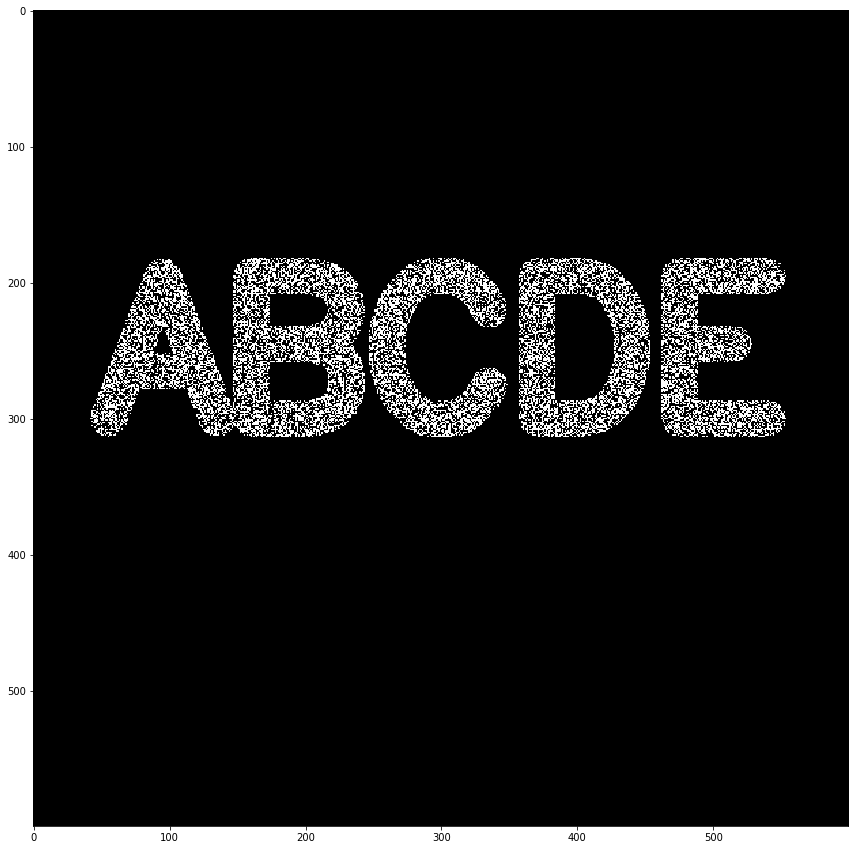

In [107]:
# essentially, what we've done is subtract -255 from the original image at random places
display_img(black_noise_img)

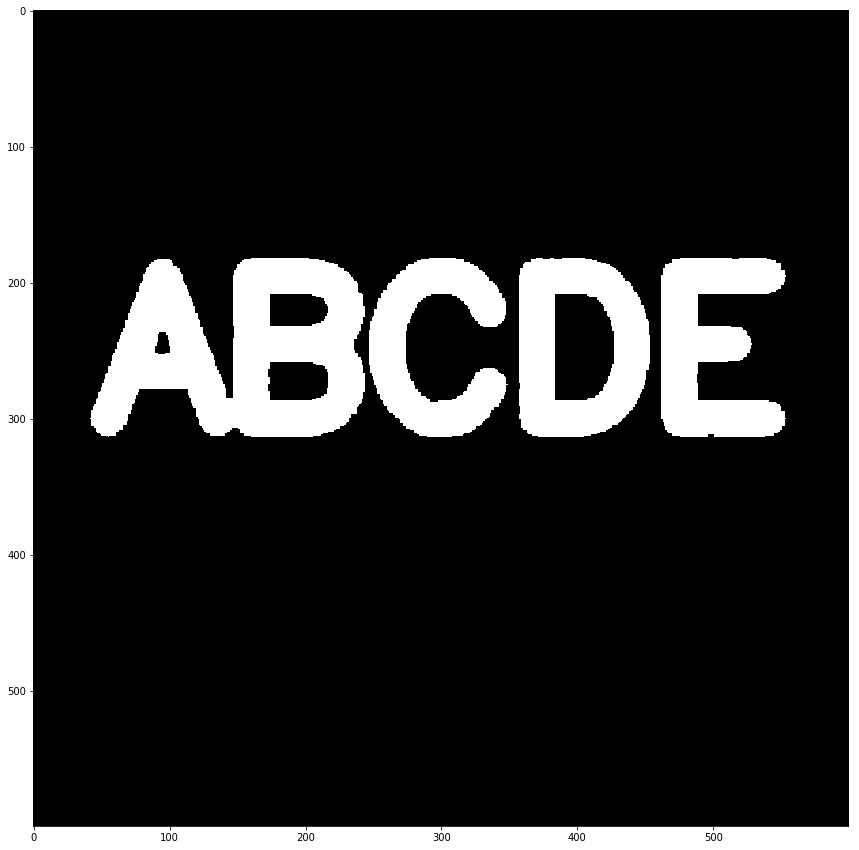

In [108]:
# closing is good for getting rid of foreground noise -> essentially revserse of OPENING
# e.g For any background boundary point, if the structuring element can be made to touch that point, 
# without any part of the element being inside a foreground region, then that point remains background. 
# If this is not possible, then the pixel is set to foreground.
closing = cv2.morphologyEx(black_noise_img,cv2.MORPH_CLOSE,kernel)
display_img(closing)

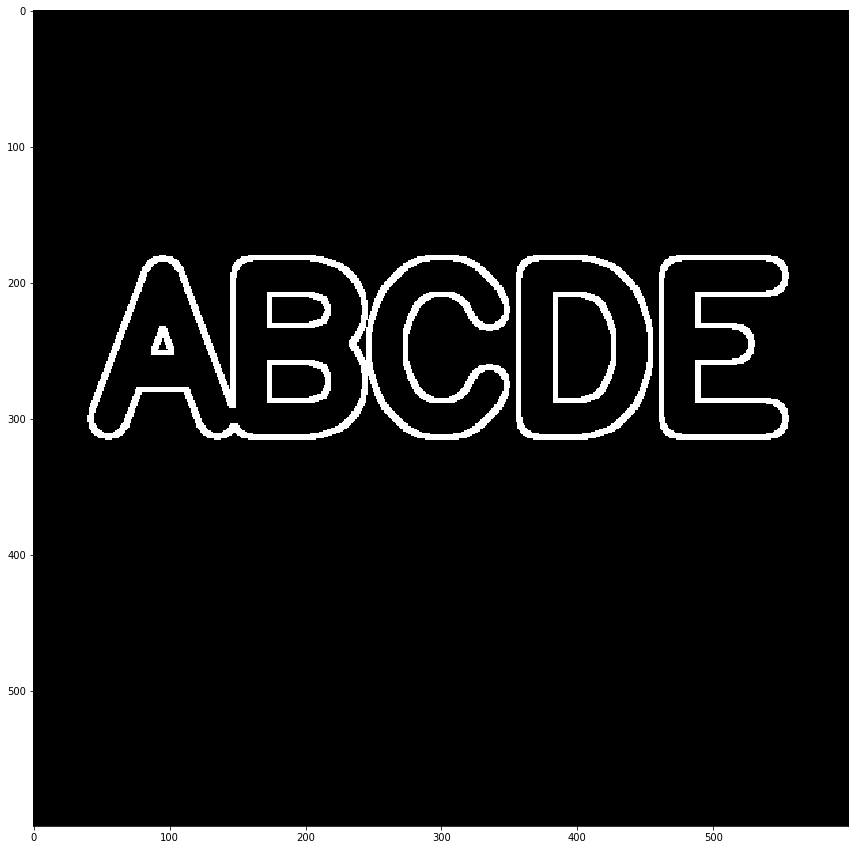

In [73]:
img = load_img()
gradient = cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)
display_img(gradient)